<a href="https://colab.research.google.com/github/marceloufjf/Alura_aulas/blob/main/Asimov_Curso_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Análise de dados - Portal da Transparência**

In [ ]:
caminho_dados = "/content/drive/MyDrive/ASIMOV ACADEMY/PYTHON_PARA_DADOS/Conteúdo feito em aula/2023_Viagem.csv"

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None) # O "None" é pra indicar que não limitarei valor máximo para colunas.
pd.set_option('display.float_format', '{:.2f}'.format)

# Lendo os dados:
df_dados = pd.read_csv(caminho_dados, encoding="Windows-1252", sep=";")

# Formatando os valores das despesas de string para float. Desta foram permitem que sejam somados.
df_dados["Valor diárias"] = df_dados["Valor diárias"].str.replace(",", ".").astype(float)
df_dados["Valor passagens"] = df_dados["Valor passagens"].str.replace(",", ".").astype(float)
df_dados["Valor devolução"] = df_dados["Valor devolução"].str.replace(",", ".").astype(float)
df_dados["Valor outros gastos"] = df_dados["Valor outros gastos"].str.replace(",", ".").astype(float)

# Criando nova coluna de despesas:
df_dados["Despesas totais"] = df_dados["Valor diárias"] + df_dados["Valor passagens"] + df_dados["Valor outros gastos"]

# Ajustando os valores nulos na coluna de cargo:
df_dados["Cargos"] = df_dados["Cargo"].fillna("Não informado") # A coluna "Cargos" foi criada sem querer:
df_dados["Cargo"] = df_dados["Cargo"].fillna("Não informado")

# Formatando coluna de datas:
df_dados["Período - Data de início"] = pd.to_datetime(df_dados["Período - Data de início"], format = "%d/%m/%Y")
df_dados["Período - Data de fim"] = pd.to_datetime(df_dados["Período - Data de fim"], format = "%d/%m/%Y")

# Criando novas colunas de datas:
df_dados["Mês da viagem"] = df_dados["Período - Data de início"].dt.month_name()
df_dados["Dias de viagem"] = (df_dados["Período - Data de fim"] - df_dados["Período - Data de início"]).dt.days


In [ ]:
# Criacão da Tabela consolidada:

df_dados_consolidado = (
    df_dados
    .groupby("Cargo")
    .agg(
        Despesa_media=("Despesas totais", "mean"),
        Dias_de_viagem_medio=("Dias de viagem", "mean"),
        Despesas_soma=("Despesas totais", "sum"),
        Destinos_mais_frequentes=("Destinos", pd.Series.mode),
        Numero_de_viagens=("Destinos", "count")
        )
    .reset_index()
    .sort_values(by="Despesa_media",ascending=False)
    )

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens):

df_cargos = df_dados["Cargo"].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos["proportion"] > 0.01, "Cargo"]
filtro = df_dados_consolidado["Cargo"].isin(cargos_relevantes)

# Chegando na tabela final - Filtrada e consolidade:

df_final = df_dados_consolidado[filtro].sort_values(by="Despesa_media",ascending=False)

In [ ]:
df_final

,Cargo,Despesa_media,Dias_de_viagem_medio,Despesas_soma,Destinos_mais_frequentes,Numero_de_viagens
686,TECNICO DO SEGURO SOCIAL,4302.48,11.37,45881679.92,Brasília/DF,10664
494,Não informado,3260.26,8.01,1049266194.86,Brasília/DF,321835
443,Informações protegidas por sigilo,3137.48,7.41,370919369.30,Informações protegidas por sigilo,118222
72,ANALISTA AMBIENTAL,2596.94,5.13,35344371.79,Brasília/DF,13610
209,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,2418.11,2.84,24405946.47,Brasília/DF,10093
569,PROFESSOR DO MAGISTERIO SUPERIOR,2032.08,3.87,110890764.22,Brasília/DF,54570
113,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,1746.79,3.06,14868670.22,Foz do Iguaçu/PR,8512
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,1465.85,2.06,24306782.30,Brasília/DF,16582
776,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,1402.20,2.34,52548741.25,Brasília/DF,37476


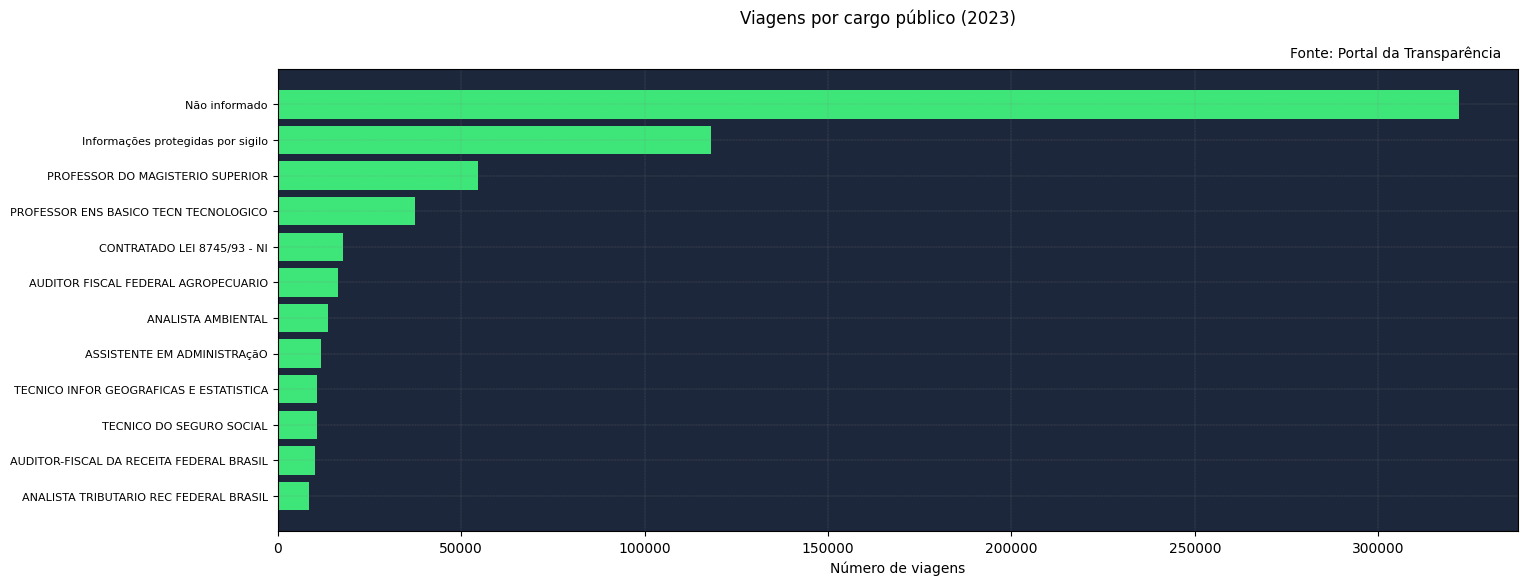

In [ ]:
# GRÁFICO

import matplotlib.pyplot as plt


df_final = df_final.sort_values(by="Numero_de_viagens",ascending=False)

# Criando a figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plotando o gráfico
ax.barh(df_final["Cargo"], df_final["Numero_de_viagens"], color = "#3ee679")
ax.invert_yaxis()

# Ajustando o gráfico
ax.set_facecolor("#1c273b")
fig.suptitle("Viagens por cargo público (2023)")
plt.figtext(0.89, 0.90, "Fonte: Portal da Transparência", fontsize=10, ha="right")
plt.grid(color = "gray", linestyle = "--", linewidth = "0.2")
plt.yticks(fontsize = 8)
plt.xlabel("Número de viagens")

# Exibindo o gráfico
plt.show()

In [ ]:
df_dados

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas totais,Cargos,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,PROFESSOR DO MAGISTERIO SUPERIOR,January,335
1,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,BIBLIOTECARIO-DOCUMENTALISTA,January,408
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,Não informado,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,Não informado,January,19
3,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,AUXILIAR DE BIBLIIOTECA,February,5
4,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826984,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,ANALISTA DO BANCO CENTRAL,December,1
826985,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,PROCURADOR DO BANCO CENTRAL,December,2
826986,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,TECNICO DO BANCO CENTRAL,December,1
826987,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,TECNICO DO BANCO CENTRAL,December,0


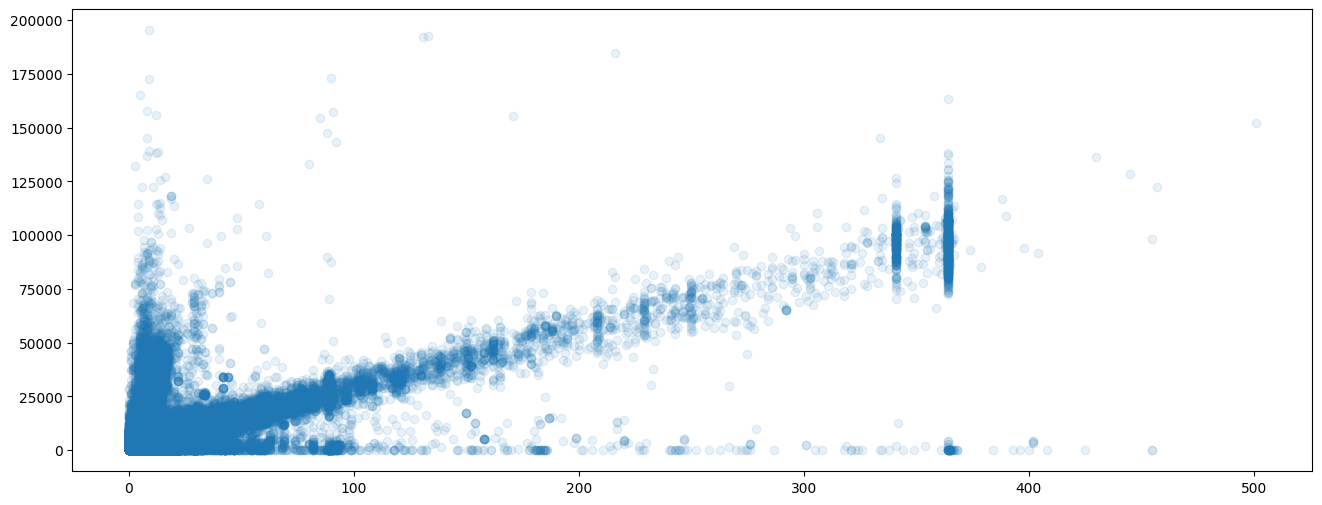

In [ ]:
# Análise da relação da despesas com os dias de viagem.

fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(df_dados["Dias de viagem"], df_dados["Despesas totais"], alpha=0.1)
# ax.set_xlim(0, 100)    Argumentos para limitar o eixo x, y e desta forma aumentar o zoom_
# ax.set_ylim(0, 25_000) _do gráfico.

In [ ]:
# Filtro com os maiores valores.

(df_dados['Despesas totais'] > 175_000).value_counts()

,count
Despesas totais,
False,826985
True,4


In [ ]:
filtro = df_dados['Despesas totais'] > 175_000
df_dados[filtro]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas totais,Cargos,Mês da viagem,Dias de viagem
129008,18782567,000277/23-5C,Realizada,SIM,A autorização de afastamento foi publicada hoj...,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.739.980-**,LEANDRO AUGUSTO ANDERSON,Não informado,CCX-0207,CCX-0207,2023-03-26,2023-08-04,"Xangai/China, São Paulo/SP",Conforme o previsto no Decreto nº 6.381 de 27 ...,174812.69,11610.06,0.00,5625.81,192048.56,Não informado,March,131
129058,18782625,000289/23-5C,Realizada,SIM,Devido ao cancelamento da Visita Oficial do PR...,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.919.570-**,LUIS CARLOS MACHADO DA SILVA,Não informado,CCX-0207,CCX-0207,2023-03-26,2023-08-06,"Xangai/China, São Paulo/SP",Conforme o previsto no Decreto nº 6.381 de 27 ...,175337.40,11757.14,0.00,5581.48,192676.02,Não informado,March,133
206998,18877982,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID006200249,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2023-06-18,2024-01-20,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,160692.47,14583.60,0.00,9511.35,184787.42,Informações protegidas por sigilo,June,216
466711,19194886,004304/23,Realizada,SIM,Mudança de itinerário devido à situação na Fai...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.501.297-**,MAURO LUIZ IECKER VIEIRA,MINISTRO DE PRIMEIRA CLASSE,CNE-0001,Cargo de Natureza Especial,2023-10-06,2023-10-15,"Jacarta/Indonésia, Phnom Penh/Camboja, Nova Yo...",Visitas oficiais a países do Sudeste Asiático.,8468.86,186723.29,0.00,0.00,195192.15,MINISTRO DE PRIMEIRA CLASSE,October,9


##**Filtro com as passagens mais caras:**

In [ ]:
# Importação de dados de passagens:

caminho_passagens = "/content/drive/MyDrive/ASIMOV ACADEMY/PYTHON_PARA_DADOS/Conteúdo feito em aula/2023_Passagem.csv"

In [ ]:
df_passagens = pd.read_csv(caminho_passagens, encoding="Windows-1252", sep=";")

In [ ]:
df_passagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,"7434,13",0,04/11/2022,11:04
1,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:39
2,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:42
3,18306785,000004/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:51
4,18306786,000003/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387668,2023001628,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"2791,41",0,NaN,00:00
387669,2023001628,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1764,54",0,NaN,00:00
387670,2023001631,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1985,65",0,NaN,00:00
387671,2023001631,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1759,88",0,NaN,00:00


In [ ]:
# Filtro com os maiores valores de passagens:

df_passagens[df_passagens["Identificador do processo de viagem"] == 19194886]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
232069,19194886,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"35304,33",0,20/11/2023,17:47
232070,19194886,004304/23,Aéreo,Indonésia,NaN,Jacarta,Camboja,NaN,Phnom Penh,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"1667,56",0,22/08/2023,14:53
232071,19194886,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"51557,43",0,17/10/2023,17:58
232072,19194886,004304/23,Aéreo,Cingapura,NaN,Cingapura,Estados Unidos da América,NaN,Nova York,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"42368,61",0,17/10/2023,17:57
232073,19194886,004304/23,Aéreo,Filipinas,NaN,San Juan - Metro Manila,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"7926,43",0,20/09/2023,11:06
232074,19194886,004304/23,Aéreo,Brasil,São Paulo,São Paulo,Indonésia,NaN,Jacarta,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"41529,96",0,22/08/2023,14:53
232075,19194886,004304/23,Aéreo,Camboja,NaN,Phnom Penh,Cingapura,NaN,Cingapura,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"6368,97",0,17/10/2023,16:33


In [ ]:
df_dados.merge(df_passagens) # o "merge" é usado para cruzar dados de tabelas.
                             # o "merge" usa uma coluna comum das tabelas para cruzarem os dados.

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas totais,Cargos,Mês da viagem,Dias de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,Não informado,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,Não informado,January,19,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,"7434,13",0,04/11/2022,11:04
1,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:39
2,18306758,000002/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.295.391-**,VITOR LUIS MARTINS FARIA,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:42
3,18306785,000004/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.221.068-**,RAFAEL RODRIGO MANCIN DE MORAIS,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:51
4,18306786,000003/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.850.918-**,BRUNO NOCENTE REGATO PEREIRA,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,"9903,32","4999,78",15/09/2022,13:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387676,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,TECNICO DO BANCO CENTRAL,December,1,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,"2791,41",0,NaN,00:00
387677,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,T

## **Salvamento da tabela e gráfico no Google drive:**

In [ ]:
Caminho_saida = "/content/drive/MyDrive/ASIMOV ACADEMY/PYTHON_PARA_DADOS/Conteúdo feito em aula/output/tabela.xlsx"

In [ ]:
df_final.to_excel(Caminho_saida, index = False)

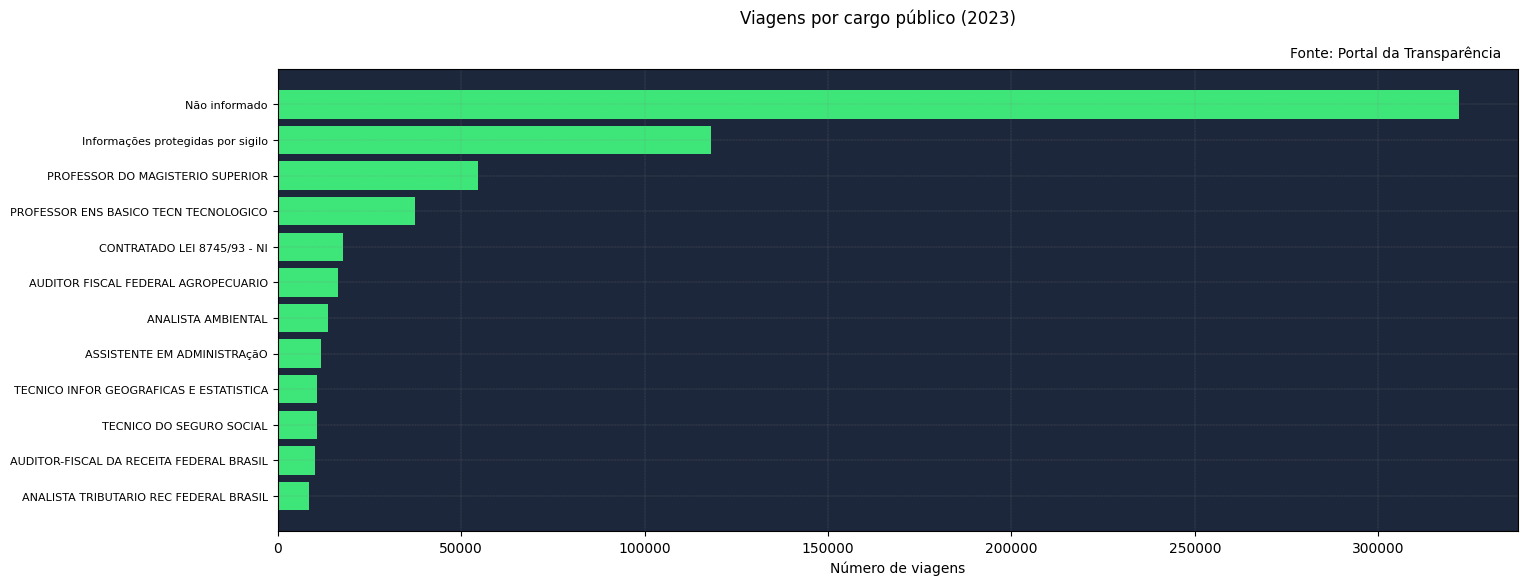

In [ ]:
import matplotlib.pyplot as plt

Caminho_figura = "/content/drive/MyDrive/ASIMOV ACADEMY/PYTHON_PARA_DADOS/Conteúdo feito em aula/output/figura.png"

df_final = df_final.sort_values(by="Numero_de_viagens",ascending=False)

# Criando a figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plotando o gráfico
ax.barh(df_final["Cargo"], df_final["Numero_de_viagens"], color = "#3ee679")
ax.invert_yaxis()

# Ajustando o gráfico
ax.set_facecolor("#1c273b")
fig.suptitle("Viagens por cargo público (2023)")
plt.figtext(0.89, 0.90, "Fonte: Portal da Transparência", fontsize=10, ha="right")
plt.grid(color = "gray", linestyle = "--", linewidth = "0.2")
plt.yticks(fontsize = 8)
plt.xlabel("Número de viagens")

# Exibindo o gráfico
plt.savefig(Caminho_figura, bbox_inches="tight")

## **Daqui em diante será mostrado como foi a sequência do aprendizado para construção da tabela e gráfico:**

In [ ]:
df_dados["Valor diárias"]

,Valor diárias
0,0.00
1,0.00
2,39565.70
3,1013.96
4,0.00
...,...
826984,606.89
826985,1089.00
826986,734.13
826987,319.28


In [ ]:
colunas = ["Valor diárias" , "Valor passagens"]
df_dados[colunas]

,Valor diárias,Valor passagens
0,0.00,0.00
1,0.00,0.00
2,39565.70,7434.13
3,1013.96,0.00
4,0.00,14903.10
...,...,...
826984,606.89,3331.29
826985,1089.00,1837.18
826986,734.13,4555.95
826987,319.28,3745.53


In [ ]:
df_dados["Nome do órgão superior"].str.replace('Ministério','Min.').str.upper()

,Nome do órgão superior
0,MIN. DA EDUCAÇÃO
1,MIN. DA EDUCAÇÃO
2,MIN. DA DEFESA
3,MIN. DA EDUCAÇÃO
4,MIN. DA DEFESA
...,...
826984,SEM INFORMAÇÃO
826985,SEM INFORMAÇÃO
826986,SEM INFORMAÇÃO
826987,SEM INFORMAÇÃO


In [ ]:
df_dados[["Valor diárias", "Valor passagens"]] # Usando dois colchetes evita-se criar uma variável.

,Valor diárias,Valor passagens
0,0.00,0.00
1,0.00,0.00
2,39565.70,7434.13
3,1013.96,0.00
4,0.00,14903.10
...,...,...
826984,606.89,3331.29
826985,1089.00,1837.18
826986,734.13,4555.95
826987,319.28,3745.53


In [ ]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826989 entries, 0 to 826988
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Identificador do processo de viagem  826989 non-null  int64         
 1   Número da Proposta (PCDP)            826989 non-null  object        
 2   Situação                             826989 non-null  object        
 3   Viagem Urgente                       826989 non-null  object        
 4   Justificativa Urgência Viagem        826887 non-null  object        
 5   Código do órgão superior             826989 non-null  int64         
 6   Nome do órgão superior               826989 non-null  object        
 7   Código órgão solicitante             826989 non-null  int64         
 8   Nome órgão solicitante               826989 non-null  object        
 9   CPF viajante                         748302 non-null  object        
 

In [ ]:
df_dados["Valor diárias"]

,Valor diárias
0,0.00
1,0.00
2,39565.70
3,1013.96
4,0.00
...,...
826984,606.89
826985,1089.00
826986,734.13
826987,319.28


In [ ]:
df_dados["Valor diárias"] + df_dados["Valor passagens"]

,0
0,0.00
1,0.00
2,46999.83
3,1013.96
4,14903.10
...,...
826984,3938.18
826985,2926.18
826986,5290.08
826987,4064.81


In [ ]:
df_dados["Despesas totais"] = df_dados["Valor diárias"] + df_dados["Valor passagens"] + df_dados["Valor outros gastos"]

In [ ]:
df_dados["Despesas totais"]

,Despesas totais
0,0.00
1,0.00
2,48095.18
3,1013.96
4,14903.10
...,...
826984,3938.18
826985,2926.18
826986,5290.08
826987,4464.81


In [ ]:
df_dados # Repare que a coluna "Despesas totais" foi acrescentada na última coluna.

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas totais,Cargos,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,PROFESSOR DO MAGISTERIO SUPERIOR,January,335
1,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,BIBLIOTECARIO-DOCUMENTALISTA,January,408
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,Não informado,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,Não informado,January,19
3,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,AUXILIAR DE BIBLIIOTECA,February,5
4,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826984,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,ANALISTA DO BANCO CENTRAL,December,1
826985,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,PROCURADOR DO BANCO CENTRAL,December,2
826986,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,TECNICO DO BANCO CENTRAL,December,1
826987,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,TECNICO DO BANCO CENTRAL,December,0


In [ ]:
df_dados["Cargo"].value_counts() # Conta a quantidade que o cargo aparece.

,count
Cargo,
Não informado,321835
Informações protegidas por sigilo,118222
PROFESSOR DO MAGISTERIO SUPERIOR,54570
PROFESSOR ENS BASICO TECN TECNOLOGICO,37476
CONTRATADO LEI 8745/93 - NI,17787
...,...
TECNICO EM HIGIENE DENTAL,1
OPERADOR DE TELE IMPRESSORA,1
ASSISTENTE TECNICO EM DESENV REGIONAL,1


In [ ]:
df_dados["Cargo"].value_counts(normalize=True) # O "normalize=true" transforma os valores de %
                                               # para forma de índices.

,proportion
Cargo,
Não informado,0.39
Informações protegidas por sigilo,0.14
PROFESSOR DO MAGISTERIO SUPERIOR,0.07
PROFESSOR ENS BASICO TECN TECNOLOGICO,0.05
CONTRATADO LEI 8745/93 - NI,0.02
...,...
TECNICO EM HIGIENE DENTAL,0.00
OPERADOR DE TELE IMPRESSORA,0.00
ASSISTENTE TECNICO EM DESENV REGIONAL,0.00


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)   # A ação ".rename("Proporção de viagens").reset_index()" substitui "proportion" por "Proporções viagens" e cria-se nova coluna.
((df_dados["Cargo"].value_counts(normalize=True) * 100)).rename("Proporção de viagens").reset_index()

,Cargo,Proporção de viagens
0,Não informado,38.92
1,Informações protegidas por sigilo,14.30
2,PROFESSOR DO MAGISTERIO SUPERIOR,6.60
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,4.53
4,CONTRATADO LEI 8745/93 - NI,2.15
...,...,...
817,TECNICO EM HIGIENE DENTAL,0.00
818,OPERADOR DE TELE IMPRESSORA,0.00
819,ASSISTENTE TECNICO EM DESENV REGIONAL,0.00
820,TECNICO DE MANUTENCAO,0.00


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_dados.groupby("Cargo")["Despesas totais"].sum().reset_index().sort_values(by="Despesas totais",ascending=False)


,Cargo,Despesas totais
494,Não informado,1049266194.86
443,Informações protegidas por sigilo,370919369.30
569,PROFESSOR DO MAGISTERIO SUPERIOR,110890764.22
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,52548741.25
686,TECNICO DO SEGURO SOCIAL,45881679.92
...,...,...
734,TECNICO EM METALURGIA,0.00
454,LOCUTOR,0.00
566,PROFESSOR ADJUNTO,0.00
818,VIDREIRO,0.00


In [ ]:
df_dados.groupby("Cargo")["Despesas totais"].max().reset_index().sort_values(by="Despesas totais",ascending=False)

,Cargo,Despesas totais
480,MINISTRO DE PRIMEIRA CLASSE,195192.15
494,Não informado,192676.02
443,Informações protegidas por sigilo,184787.42
542,PESQUISADOR EM SAUDE PUBLICA,172409.29
83,ANALISTA DE PLANEJAMENTO E ORCAMENTO,157255.53
...,...,...
220,AUXILIAR - AUXILIAR DE SERVICOS GERAIS,0.00
454,LOCUTOR,0.00
818,VIDREIRO,0.00
724,TECNICO EM GEOLOGIA,0.00


In [ ]:
viagens_por_cargo = ((df_dados["Cargo"].value_counts(normalize=True) * 100)).rename("Proporção de viagens").reset_index()

In [ ]:
filtro_1_pct = viagens_por_cargo ["Proporção de viagens"] > 1

In [ ]:
viagens_por_cargo[filtro_1_pct]

,Cargo,Proporção de viagens
0,Não informado,38.92
1,Informações protegidas por sigilo,14.30
2,PROFESSOR DO MAGISTERIO SUPERIOR,6.60
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,4.53
4,CONTRATADO LEI 8745/93 - NI,2.15
5,AUDITOR FISCAL FEDERAL AGROPECUARIO,2.01
6,ANALISTA AMBIENTAL,1.65
7,ASSISTENTE EM ADMINISTRAçãO,1.41
8,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1.31
9,TECNICO DO SEGURO SOCIAL,1.29


In [ ]:
filtro_tecnico = viagens_por_cargo["Cargo"].str.startswith("TECNICO")

In [ ]:
viagens_por_cargo[filtro_tecnico]

,Cargo,Proporção de viagens
8,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1.31
9,TECNICO DO SEGURO SOCIAL,1.29
15,TECNICO AMBIENTAL,0.72
19,TECNICO ADMINISTRATIVO,0.53
24,TECNICO EM ASSUNTOS EDUCACIONAIS,0.35
...,...,...
803,TECNICO NM - 02 (DEC JUD-ME),0.00
814,TECNICO EM MANUTENCAO,0.00
817,TECNICO EM HIGIENE DENTAL,0.00
820,TECNICO DE MANUTENCAO,0.00


In [ ]:
viagens_por_cargo[filtro_tecnico & filtro_1_pct] # O "&" equivale ao "and".

,Cargo,Proporção de viagens
8,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1.31
9,TECNICO DO SEGURO SOCIAL,1.29


In [ ]:
viagens_por_cargo[filtro_tecnico | filtro_1_pct] # O "|" equivale ao "or".

,Cargo,Proporção de viagens
0,Não informado,38.92
1,Informações protegidas por sigilo,14.30
2,PROFESSOR DO MAGISTERIO SUPERIOR,6.60
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,4.53
4,CONTRATADO LEI 8745/93 - NI,2.15
...,...,...
803,TECNICO NM - 02 (DEC JUD-ME),0.00
814,TECNICO EM MANUTENCAO,0.00
817,TECNICO EM HIGIENE DENTAL,0.00
820,TECNICO DE MANUTENCAO,0.00


In [ ]:
gasto_totais_por_cargo = df_dados.groupby("Cargo")["Despesas totais"].sum().reset_index().sort_values(by="Despesas totais",ascending=False)

In [ ]:
filtro_gastos_grandes = gasto_totais_por_cargo["Despesas totais"] > 10_000_000

In [ ]:
gasto_totais_por_cargo[filtro_gastos_grandes]

,Cargo,Despesas totais
494,Não informado,1049266194.86
443,Informações protegidas por sigilo,370919369.30
569,PROFESSOR DO MAGISTERIO SUPERIOR,110890764.22
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,52548741.25
686,TECNICO DO SEGURO SOCIAL,45881679.92
72,ANALISTA AMBIENTAL,35344371.79
389,ESP EM REGULACAO E VIGILANCIA SANITARIA,24439537.06
209,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,24405946.47
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,24306782.30
315,CONTRATADO LEI 8745/93 - NI,17510463.07


In [ ]:
# Surgerido no Curso sem criar uma vatiável a mais de filtro
gasto_totais_por_cargo[gasto_totais_por_cargo["Despesas totais"] > 10_000_000] # separador de milhar "_".

# Repetiu "gasto_totais_por_cargo" duas vezes. Desta forma evitou-se criar outro filtro
# como no exemplo acima.

,Cargo,Despesas totais
494,Não informado,1049266194.86
443,Informações protegidas por sigilo,370919369.30
569,PROFESSOR DO MAGISTERIO SUPERIOR,110890764.22
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,52548741.25
686,TECNICO DO SEGURO SOCIAL,45881679.92
72,ANALISTA AMBIENTAL,35344371.79
389,ESP EM REGULACAO E VIGILANCIA SANITARIA,24439537.06
209,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,24405946.47
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,24306782.30
315,CONTRATADO LEI 8745/93 - NI,17510463.07


In [ ]:
# Ao trocar "sum()" por "mean()" calcula-se o gasto médio:
gasto_medio_por_cargo = df_dados.groupby("Cargo")["Despesas totais"].mean().reset_index().sort_values(by="Despesas totais",ascending=False)

In [ ]:
gasto_medio_por_cargo[gasto_medio_por_cargo["Despesas totais"] > 10_000]

,Cargo,Despesas totais
616,SEGUNDO TENENTE,40372.27
325,DELEGADO DE POLICIA - PRIMEIRA CLASSE,34105.32
617,SEGUNDO-TENENTE,19820.29
480,MINISTRO DE PRIMEIRA CLASSE,19072.66
801,TERCEIRO SARGENTO,19032.81
257,AUXILIAR DE SERVICOS DIVERSOS,19000.96
552,PRIMEIRO SARGENTO,17509.58
3,AAD-AUXILIAR DE RECURSOS FINANCEIROS,15545.94
525,PAPILOSCOPISTA POLICIAL-SEGUNDA CLASSE,15421.69
481,MINISTRO DE SEGUNDA CLASSE,14458.99


In [ ]:
df_dados["Cargo"].value_counts(normalize=True).sum()

1.0

In [ ]:
df_dados["Cargo"].value_counts(dropna=False) # O "dropna=False" é uma forma de mostrar os valores nulos "NaN".
# "drop" significa derrubar e "na" valor nulo.

,count
Cargo,
Não informado,321835
Informações protegidas por sigilo,118222
PROFESSOR DO MAGISTERIO SUPERIOR,54570
PROFESSOR ENS BASICO TECN TECNOLOGICO,37476
CONTRATADO LEI 8745/93 - NI,17787
...,...
TECNICO EM HIGIENE DENTAL,1
OPERADOR DE TELE IMPRESSORA,1
ASSISTENTE TECNICO EM DESENV REGIONAL,1


In [ ]:
# Vamos usar a tabela inteira agora
df_dados.dropna(subset=["Cargos"]) # eliminei os valores nulos somente na coluna "Cargo"
                                  # Aqui não usei "dropna=False". Por isso foi eliminado os nulos.

# A planilha que antes tinha "826989 rows × 23 columns" agora tem "505154 rows × 23 columns"

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas totais,Cargos,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,PROFESSOR DO MAGISTERIO SUPERIOR,January,335
1,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,BIBLIOTECARIO-DOCUMENTALISTA,January,408
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,Não informado,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,Não informado,January,19
3,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,AUXILIAR DE BIBLIIOTECA,February,5
4,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826984,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,ANALISTA DO BANCO CENTRAL,December,1
826985,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,PROCURADOR DO BANCO CENTRAL,December,2
826986,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,TECNICO DO BANCO CENTRAL,December,1
826987,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,TECNICO DO BANCO CENTRAL,December,0


In [ ]:
# Agora em vez de eliminar irei preencher os "NaN" com outro nome.
df_dados["Cargo"].fillna("Não informado") # troquei o "dropna" por "fillna" seguido do texto entre parênteses.

,Cargo
0,PROFESSOR DO MAGISTERIO SUPERIOR
1,BIBLIOTECARIO-DOCUMENTALISTA
2,Não informado
3,AUXILIAR DE BIBLIIOTECA
4,Não informado
...,...
826984,ANALISTA DO BANCO CENTRAL
826985,PROCURADOR DO BANCO CENTRAL
826986,TECNICO DO BANCO CENTRAL
826987,TECNICO DO BANCO CENTRAL


In [ ]:
df_dados.fillna("Não identificado") # Usando a planilha inteira

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas totais,Cargos,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,PROFESSOR DO MAGISTERIO SUPERIOR,January,335
1,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,Não identificado,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,BIBLIOTECARIO-DOCUMENTALISTA,January,408
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,Não informado,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,Não informado,January,19
3,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,AUXILIAR DE BIBLIIOTECA,February,5
4,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826984,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,ANALISTA DO BANCO CENTRAL,December,1
826985,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,PROCURADOR DO BANCO CENTRAL,December,2
826986,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,TECNICO DO BANCO CENTRAL,December,1
826987,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,TECNICO DO BANCO CENTRAL,December,0


In [ ]:
# Ajustando valores nulos na coluna "Cargo"
df_dados["Cargos"] = df_dados["Cargo"].fillna("Não informado")
df_dados["Cargo"] = df_dados["Cargo"].fillna("Não informado")
df_dados # acrescentei sem querer uma nova coluna ao trocar "Cargo" por "Cargos" no plural.

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas totais,Cargos,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,PROFESSOR DO MAGISTERIO SUPERIOR,January,335
1,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,BIBLIOTECARIO-DOCUMENTALISTA,January,408
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,Não informado,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,Não informado,January,19
3,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,AUXILIAR DE BIBLIIOTECA,February,5
4,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826984,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,ANALISTA DO BANCO CENTRAL,December,1
826985,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,PROCURADOR DO BANCO CENTRAL,December,2
826986,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,TECNICO DO BANCO CENTRAL,December,1
826987,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,TECNICO DO BANCO CENTRAL,December,0


In [ ]:
pd.to_datetime(df_dados["Período - Data de início"], format = "%d/%m/%Y")

,Período - Data de início
0,2023-01-01
1,2023-01-16
2,2023-01-10
3,2023-02-05
4,2023-01-01
...,...
826984,2023-12-05
826985,2023-12-11
826986,2023-12-07
826987,2023-12-11


In [ ]:
df_dados["Período - Data de início"] = pd.to_datetime(df_dados["Período - Data de início"], format = "%d/%m/%Y")
df_dados["Período - Data de fim"] = pd.to_datetime(df_dados["Período - Data de fim"], format = "%d/%m/%Y")

In [ ]:
df_dados

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas totais,Cargos,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,PROFESSOR DO MAGISTERIO SUPERIOR,January,335
1,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,BIBLIOTECARIO-DOCUMENTALISTA,January,408
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,Não informado,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,Não informado,January,19
3,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,AUXILIAR DE BIBLIIOTECA,February,5
4,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826984,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,ANALISTA DO BANCO CENTRAL,December,1
826985,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,PROCURADOR DO BANCO CENTRAL,December,2
826986,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,TECNICO DO BANCO CENTRAL,December,1
826987,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,TECNICO DO BANCO CENTRAL,December,0


In [ ]:
df_dados["Mês da viagem"] = df_dados["Período - Data de início"].dt.month_name()

In [ ]:
df_dados["Período - Data de fim"] - df_dados["Período - Data de início"]

,0
0,335 days
1,408 days
2,19 days
3,5 days
4,187 days
...,...
826984,1 days
826985,2 days
826986,1 days
826987,0 days


In [ ]:
(df_dados["Período - Data de fim"] - df_dados["Período - Data de início"]).dt.days

,0
0,335
1,408
2,19
3,5
4,187
...,...
826984,1
826985,2
826986,1
826987,0


In [ ]:
df_dados["Dias de viagem"] = (df_dados["Período - Data de fim"] - df_dados["Período - Data de início"]).dt.days

In [ ]:
df_dados # repare que foi acrescentado a coluna "Dias de viagem"

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas totais,Cargos,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,PROFESSOR DO MAGISTERIO SUPERIOR,January,335
1,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,BIBLIOTECARIO-DOCUMENTALISTA,January,408
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,Não informado,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,Não informado,January,19
3,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,AUXILIAR DE BIBLIIOTECA,February,5
4,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,Não informado,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,Não informado,January,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826984,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,ANALISTA DO BANCO CENTRAL,December,1
826985,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,PROCURADOR DO BANCO CENTRAL,December,2
826986,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,TECNICO DO BANCO CENTRAL,December,1
826987,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,TECNICO DO BANCO CENTRAL,December,0


In [ ]:
dias_de_viagem_por_cargo = df_dados.groupby("Cargo")["Dias de viagem"].mean().reset_index().sort_values(by="Dias de viagem",ascending=False)

In [ ]:
dias_de_viagem_por_cargo

,Cargo,Dias de viagem
616,SEGUNDO TENENTE,163.30
325,DELEGADO DE POLICIA - PRIMEIRA CLASSE,125.00
801,TERCEIRO SARGENTO,71.67
617,SEGUNDO-TENENTE,65.50
552,PRIMEIRO SARGENTO,64.68
...,...,...
338,DIRETOR DE IMAGEM,0.00
128,ARQUIVISTA DE TAPES,0.00
447,JORNALISTA - 25H,0.00
169,ASSISTENTE DE CAMERA,0.00


In [ ]:
dias_de_viagem_por_cargo_maximo = df_dados.groupby("Cargo")["Dias de viagem"].max().reset_index().sort_values(by="Dias de viagem",ascending=False)

In [ ]:
dias_de_viagem_por_cargo_maximo

,Cargo,Dias de viagem
443,Informações protegidas por sigilo,501
569,PROFESSOR DO MAGISTERIO SUPERIOR,455
12,ADVOGADO DA UNIAO,425
289,BIBLIOTECARIO-DOCUMENTALISTA,408
494,Não informado,402
...,...,...
732,TECNICO EM MANUTENCAO,0
119,APOIO OPERACIONAL A PRODUCAO,0
746,TECNICO EM PRESERVACAO ARQUITETONICA II,0
751,TECNICO EM RADIOLOGIA 24 HORAS,0


In [ ]:
(
    df_dados
    .groupby("Cargo")
    .agg(
        Despesa_media=("Despesas totais", "mean"),
        Dias_de_viagem_medio=("Dias de viagem", "mean"),
        Despesas_soma=("Despesas totais", "sum"),
        Destinos_mais_frequentes=("Destinos", pd.Series.mode), # esse comando calcula a "moda" de cada cargo, ou seja, o valor que mais repete..
        Numero_de_viagens=("Destinos", "count")
        )
    .reset_index()
    .sort_values(by="Despesa_media",ascending=False)
    )



,Cargo,Despesa_media,Dias_de_viagem_medio,Despesas_soma,Destinos_mais_frequentes,Numero_de_viagens
616,SEGUNDO TENENTE,40372.27,163.30,403722.70,"[Amambaí/MS, Juína/MT, Colniza/MT, Juína/MT, P...",10
325,DELEGADO DE POLICIA - PRIMEIRA CLASSE,34105.32,125.00,34105.32,"São Paulo/SP, Santos/SP, São Paulo/SP, São Pau...",1
617,SEGUNDO-TENENTE,19820.29,65.50,158562.30,"[Calçoene/AP, Itaubal/AP]",8
480,MINISTRO DE PRIMEIRA CLASSE,19072.66,5.93,15868456.64,Brasília/DF,832
801,TERCEIRO SARGENTO,19032.81,71.67,685180.98,Aracaju/SE,36
...,...,...,...,...,...,...
220,AUXILIAR - AUXILIAR DE SERVICOS GERAIS,0.00,7.71,0.00,"[Ponta Porã/MS, Tacuru/MS]",7
566,PROFESSOR ADJUNTO,0.00,5.00,0.00,Buenos Aires/Argentina,1
152,ASG - OPERADOR DE MAQUINA E EQUIPAMENTOS,0.00,8.00,0.00,Guaíra/PR,1
818,VIDREIRO,0.00,6.00,0.00,Brasília/DF,1


In [ ]:
df_cargos = df_dados["Cargo"].value_counts(normalize=True).reset_index()
df_cargos

,Cargo,proportion
0,Não informado,0.39
1,Informações protegidas por sigilo,0.14
2,PROFESSOR DO MAGISTERIO SUPERIOR,0.07
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,0.05
4,CONTRATADO LEI 8745/93 - NI,0.02
...,...,...
817,TECNICO EM HIGIENE DENTAL,0.00
818,OPERADOR DE TELE IMPRESSORA,0.00
819,ASSISTENTE TECNICO EM DESENV REGIONAL,0.00
820,TECNICO DE MANUTENCAO,0.00


###No Pandas, o **" loc "** é um atributo usado para acessar grupos de linhas e colunas em um DataFrame ou Series, baseado em rótulos ou em uma condição booleana. Ele permite realizar seleção e manipulação de dados de forma eficiente.

**Ex: df.loc [ linhas, colunas ]**


In [ ]:
df_cargos.loc[df_cargos["proportion"] > 0.01, "Cargo"] # Ao especificar "Cargo" no final, selecion-se somente
                                                       # a coluna "Cargo" com os parâmetros da coluna "proportion", como no ProcV do Excel.

,Cargo
0,Não informado
1,Informações protegidas por sigilo
2,PROFESSOR DO MAGISTERIO SUPERIOR
3,PROFESSOR ENS BASICO TECN TECNOLOGICO
4,CONTRATADO LEI 8745/93 - NI
5,AUDITOR FISCAL FEDERAL AGROPECUARIO
6,ANALISTA AMBIENTAL
7,ASSISTENTE EM ADMINISTRAçãO
8,TECNICO INFOR GEOGRAFICAS E ESTATISTICA
9,TECNICO DO SEGURO SOCIAL


In [ ]:
df_dados_consolidado = (
    df_dados
    .groupby("Cargo")
    .agg(
        Despesa_media=("Despesas totais", "mean"),
        Dias_de_viagem_medio=("Dias de viagem", "mean"),
        Despesas_soma=("Despesas totais", "sum"),
        Destinos_mais_frequentes=("Destinos", pd.Series.mode),
        Numero_de_viagens=("Destinos", "count")
        )
    .reset_index()
    .sort_values(by="Despesa_media",ascending=False)
    )

In [ ]:
cargos_relevantes = df_cargos.loc[df_cargos["proportion"] > 0.01, "Cargo"]

In [ ]:
df_dados_consolidado["Cargo"].isin(cargos_relevantes)

,Cargo
616,False
325,False
617,False
480,False
801,False
...,...
220,False
566,False
152,False
818,False


In [ ]:
# Posso criar uma variável para o filtro gerado acima e em seguida aplicá-lo:
filtro = df_dados_consolidado["Cargo"].isin(cargos_relevantes)

df_dados_consolidado[filtro].sort_values(by="Despesa_media",ascending=False) # ordenei pela coluna "Despesa_media".

,Cargo,Despesa_media,Dias_de_viagem_medio,Despesas_soma,Destinos_mais_frequentes,Numero_de_viagens
686,TECNICO DO SEGURO SOCIAL,4302.48,11.37,45881679.92,Brasília/DF,10664
494,Não informado,3260.26,8.01,1049266194.86,Brasília/DF,321835
443,Informações protegidas por sigilo,3137.48,7.41,370919369.30,Informações protegidas por sigilo,118222
72,ANALISTA AMBIENTAL,2596.94,5.13,35344371.79,Brasília/DF,13610
209,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,2418.11,2.84,24405946.47,Brasília/DF,10093
569,PROFESSOR DO MAGISTERIO SUPERIOR,2032.08,3.87,110890764.22,Brasília/DF,54570
113,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,1746.79,3.06,14868670.22,Foz do Iguaçu/PR,8512
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,1465.85,2.06,24306782.30,Brasília/DF,16582
776,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,1402.20,2.34,52548741.25,Brasília/DF,37476


In [ ]:
# Ou posso fazer sem filtro
df_dados_consolidado[df_dados_consolidado["Cargo"].isin(cargos_relevantes)].sort_values(by="Despesa_media",ascending=False)

,Cargo,Despesa_media,Dias_de_viagem_medio,Despesas_soma,Destinos_mais_frequentes,Numero_de_viagens
686,TECNICO DO SEGURO SOCIAL,4302.48,11.37,45881679.92,Brasília/DF,10664
494,Não informado,3260.26,8.01,1049266194.86,Brasília/DF,321835
443,Informações protegidas por sigilo,3137.48,7.41,370919369.30,Informações protegidas por sigilo,118222
72,ANALISTA AMBIENTAL,2596.94,5.13,35344371.79,Brasília/DF,13610
209,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,2418.11,2.84,24405946.47,Brasília/DF,10093
569,PROFESSOR DO MAGISTERIO SUPERIOR,2032.08,3.87,110890764.22,Brasília/DF,54570
113,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,1746.79,3.06,14868670.22,Foz do Iguaçu/PR,8512
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,1465.85,2.06,24306782.30,Brasília/DF,16582
776,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,1402.20,2.34,52548741.25,Brasília/DF,37476


In [ ]:
df_final

,Cargo,Despesa_media,Dias_de_viagem_medio,Despesas_soma,Destinos_mais_frequentes,Numero_de_viagens
494,Não informado,3260.26,8.01,1049266194.86,Brasília/DF,321835
443,Informações protegidas por sigilo,3137.48,7.41,370919369.30,Informações protegidas por sigilo,118222
569,PROFESSOR DO MAGISTERIO SUPERIOR,2032.08,3.87,110890764.22,Brasília/DF,54570
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,1402.20,2.34,52548741.25,Brasília/DF,37476
315,CONTRATADO LEI 8745/93 - NI,984.45,2.84,17510463.07,Bauru/SP,17787
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,1465.85,2.06,24306782.30,Brasília/DF,16582
72,ANALISTA AMBIENTAL,2596.94,5.13,35344371.79,Brasília/DF,13610
179,ASSISTENTE EM ADMINISTRAçãO,1291.03,2.17,15094703.63,Brasília/DF,11692
776,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855
686,TECNICO DO SEGURO SOCIAL,4302.48,11.37,45881679.92,Brasília/DF,10664


In [ ]:
df_final = df_final.sort_values(by="Numero_de_viagens",ascending=False)

<Axes: xlabel='Cargo'>

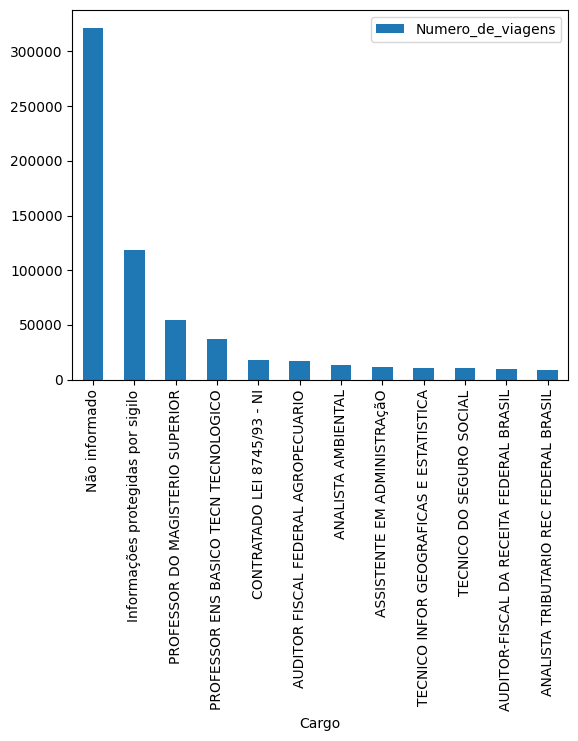

In [ ]:
df_final.plot(x="Cargo", y="Numero_de_viagens", kind="bar")

In [ ]:
import matplotlib.pyplot as plt

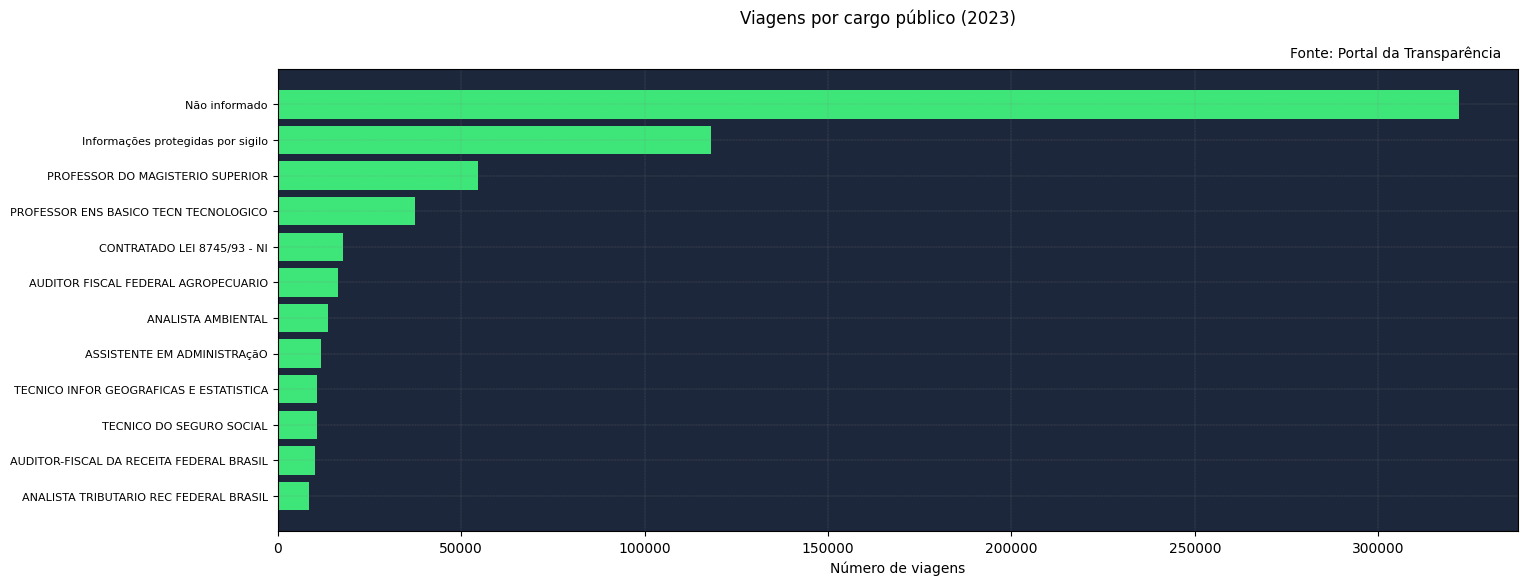

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.barh(df_final["Cargo"], df_final["Numero_de_viagens"], color = "#3ee679")
ax.invert_yaxis()
ax.set_facecolor("#1c273b")

fig.suptitle("Viagens por cargo público (2023)")

plt.figtext(0.89, 0.90, "Fonte: Portal da Transparência", fontsize=10, ha="right")
plt.grid(color = "gray", linestyle = "--", linewidth = "0.2")
plt.yticks(fontsize = 8)
plt.xlabel("Número de viagens")
plt.show()